In [10]:
import torch
from d2l import torch as d2l
import numpy as np
from matplotlib import pyplot as plt
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import random

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64
(28, 28)


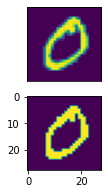

In [6]:


mnist_train = datasets.MNIST(
    root='/Users/jw733991/Documents/nus_/Jan2020/5340/project/mnist-data/', train=True, transform=ToTensor(), download=True)
mnist_test = datasets.MNIST(
    root='/Users/jw733991/Documents/nus_/Jan2020/5340/project/mnist-data/', train=False, transform=ToTensor(), download=True)

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(mnist_train, batch_size=batch_size)
test_dataloader = DataLoader(mnist_test, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break
    
    

x1 = torch.stack([mnist_train[1][0]],
                     dim=1).squeeze(0)
y1 = torch.tensor([mnist_train[1][1]])
x1.shape
d2l.show_images(x1,2,1);

def binarize_image(img_eq):
    img_bin = np.copy(img_eq)
    img_bin[img_bin < 0.5] = -1
    img_bin[img_bin >= 0.5] = 1
    return img_bin

X2 = binarize_image(x1[0])
print(X2.shape)
plt.imshow(X2)
plt.show()


In [11]:
class IsingModel:
    def __init__(self, image, ext_factor, beta):

        self.width, self.height, self.ext_factor, self.beta = image.shape[0], image.shape[1], ext_factor, beta
        self.image = image

    def neighbours(self, x, y):
        n = []
        if x == 0:
            n.append((self.width-1, y))
        else:
            n.append((x-1, y))
        if x == self.width-1:
            n.append((0, y))
        else:
            n.append((x+1, y))
        if y == 0:
            n.append((x, self.height-1))
        else:
            n.append((x, y-1))
        if y == self.height-1:
            n.append((x, 0))
        else:
            n.append((x, y+1))
        return n

    def local_energy(self, x, y):
        return self.ext_factor[x,y] + sum(self.image[xx,yy] for (xx, yy) in self.neighbours(x, y))

    def gibbs_sample(self, x, y):
        p = 1 / (1 + np.exp(-2 * self.beta * self.local_energy(x,y)))
        if random.uniform(0, 1) <= p:
            self.image[x, y] = 1
        else:
            self.image[x, y] = -1



def denoise(image, q, burn_in, iterations):
    external_factor = 0.5 * np.log(q / (1-q))
    model = IsingModel(image, external_factor*image, 3)

    avg = np.zeros_like(image).astype(np.float64)
    for i in range(burn_in + iterations):
        print("Iteration - " + str(i))
        for x in range(image.shape[0]):
            for y in range(image.shape[1]):
                if(random.uniform(0, 1) <= 0.7):
                    model.gibbs_sample(x, y)
        if(i > burn_in):
            avg += model.image
    return avg / iterations

Iteration - 0
Iteration - 1
Iteration - 2
Iteration - 3
Iteration - 4
Iteration - 5
Iteration - 6
Iteration - 7
Iteration - 8
Iteration - 9
Iteration - 10
Iteration - 11
Iteration - 12
Iteration - 13
Iteration - 14


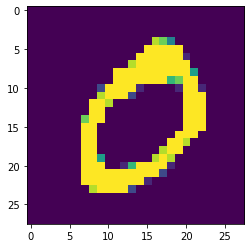

In [12]:
avg = denoise(X2, 0.7, 5, 10)
plt.imshow(avg)